FIIs

scrap realizado na pagina: https://www.fundsexplorer.com.br/

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

In [102]:
# Configurações do Selenium
driver = webdriver.Chrome()  # This assumes the ChromeDriver is in the PATH
url_alvo = 'https://www.fundsexplorer.com.br/ranking'  # URL alvo para o web scraping

In [103]:
# Navega para a URL alvo
driver.get(url_alvo)

In [104]:
# Aguarda até que a tabela de fundos seja carregada
try:
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '/html/body/div[3]'))
    )
except Exception as e:
    print("A tabela não foi encontrada:", e)
    driver.quit()
    exit()

In [105]:
# Obtém todas as linhas da tabela de fundos
linhas_tabela = table.find_elements(By.XPATH, './/tbody/tr')

# Lista para armazenar os dados
dados_fundos = []

In [106]:
# Percorre as linhas e obtém os dados
for linha in linhas_tabela:
    colunas = linha.find_elements(By.TAG_NAME, 'td')
    if len(colunas) >= 27:
        fundos = colunas[0].text
        setor = colunas[1].text
        preço_atual = colunas[2].text
        liquidez_diaria = colunas[3].text
        pvp = colunas[4].text
        ultimo_dividendo = colunas[5].text
        dividendo_yield = colunas[6].text
        dy_3m_acumulado = colunas[7].text
        dy_6m_acumulado = colunas[8].text
        dy_12m_acumulado = colunas[9].text
        dy_3m_media = colunas[10].text
        dy_6m_media = colunas[11].text
        dy_12m_media = colunas[12].text
        dy_ano = colunas[13].text
        variacao_preco = colunas[14].text
        rentabilidade_periodo = colunas[15].text
        rentabilidade_acumulada = colunas[16].text
        patrimonio_liquido = colunas[17].text
        vpa = colunas[18].text
        pvpa = colunas[19].text
        dy_patrimonial = colunas[20].text
        variacao_patrimonial = colunas[21].text
        rentabilidade_patrimonio_periodo = colunas[22].text
        rentabilidade_patrimonio_acumulada = colunas[23].text
        vacancia_fisica = colunas[24].text
        vacancia_financeira = colunas[25].text
        quantidade_de_ativos = colunas[26].text


        dados_fundos.append([fundos, setor, preço_atual, liquidez_diaria, pvp, ultimo_dividendo, dividendo_yield, 
                             dy_3m_acumulado, dy_6m_acumulado, dy_12m_acumulado, dy_3m_media, dy_6m_media, dy_12m_media,
                             dy_ano, variacao_preco, rentabilidade_periodo, rentabilidade_acumulada, patrimonio_liquido, 
                             vpa, pvpa, dy_patrimonial, variacao_patrimonial, rentabilidade_patrimonio_periodo, 
                             rentabilidade_patrimonio_acumulada, vacancia_fisica, vacancia_financeira, quantidade_de_ativos])

In [107]:

# Cria um DataFrame usando Pandas
df = pd.DataFrame(dados_fundos, columns=["Fundos", "Setor", "Preço Atual(R$)", "Liquidez Diária", "P/VP", 
                                         "Ultimo Dividendo", "Dividend Yield", "DY (3M) Acumulado", "DY(6M) Acumulado",
                                         "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
                                         "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", 
                                         "VPA", "P/VPA", "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", 
                                         "Rentab. Patr. Acumulada", "Vacancia Física", "Vacancia Financeira", "Quantidade de Ativos"])



# Finaliza o driver
driver.quit()

In [108]:
df = df.replace('N/A', None)

In [109]:
df.head(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,"9,42","930.832,31","1,01","0,10","1,03 %","3,83 %","8,26 %","8,26 %",...,"230.646.828,88","9,60","0,98","1,46 %","0,00 %","0,00 %","0,00 %",None,None,0
1,ABCP11,SHOPPINGS,"71,90","59.727,24","0,78","0,50","0,70 %","2,15 %","4,44 %","8,96 %",...,"432.162.687,00","91,82","0,78","0,65 %","-0,18 %","0,47 %","7,12 %",None,None,1
2,AFHI11,PAPÉIS,"96,36","992.736,38","1,00","1,10","1,11 %","3,38 %","6,80 %","13,31 %",...,"290.388.018,85","94,82","1,02","1,01 %","-0,94 %","0,06 %","5,00 %",None,None,0
3,AGRX11,OUTROS,"10,94","307.974,33",None,"0,17","1,49 %","4,76 %","9,47 %","14,70 %",...,None,None,None,None,None,None,None,None,None,0
4,AIEC11,LAJES CORPORATIVAS,"71,57","510.684,48","0,75","0,78","1,10 %","3,59 %","6,31 %","13,04 %",...,"456.469.305,49","102,56","0,70","0,73 %","0,24 %","0,98 %","9,40 %",None,None,2


In [110]:
df.sample(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
16,BBFO11,FUNDO DE FUNDOS,"76,85","232.301,36","0,91","0,69","0,95 %","3,04 %","6,39 %","12,17 %",...,"329.004.492,49","82,36","0,93","0,73 %","-4,19 %","-3,49 %","4,75 %",None,None,0
252,PLOG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,"66,71","70.165,04","0,63","0,70","0,99 %","3,05 %","6,10 %","12,13 %",...,"79.648.071,76","100,39","0,66","0,75 %","-0,02 %","0,72 %","8,77 %",None,None,1
11,ASMT11,LAJES CORPORATIVAS,"49,53","28.859,40","0,58","0,77","1,11 %","3,18 %","6,17 %","11,50 %",...,"85.749.077,74",None,None,None,None,None,None,None,None,3
64,CCRF11,PAPÉIS,"90,99","4.154,06","0,91","1,65","1,90 %","3,38 %","6,30 %","9,64 %",...,"156.809.423,96","96,46","0,94","0,57 %","-1,87 %","-1,31 %","2,72 %",None,None,0
112,FIIP11B,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,"178,49","63.326,43","0,86","1,44","0,87 %","2,66 %","5,49 %","10,65 %",...,"188.397.416,59","186,18","0,96","0,73 %","-0,12 %","0,60 %","0,12 %",None,None,7


In [111]:
df.tail(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
383,XTED11,LAJES CORPORATIVAS,"8,82","17.641,88","0,68","11,16",None,None,None,None,...,"67.378.204,04","28,02","0,31","0,00 %","-0,36 %","-0,36 %","-3,45 %",None,None,1
384,YUFI11,FUNDO DE DESENVOLVIMENTO,"80,01","3.129,92","0,79","0,33","0,33 %","0,48 %","0,72 %","0,72 %",...,"50.096.123,92",None,None,None,None,None,None,None,None,31
385,YUFI11B,INDEFINIDO,None,None,None,"0,63","0,00 %","0,00 %","0,00 %","0,00 %",...,None,"105,53",None,"0,60 %","-0,01 %","0,59 %","6,32 %",None,None,0
386,ZAVI11,INDEFINIDO,"127,45","166.377,79","0,93","1,16","0,92 %","2,66 %","5,15 %","7,00 %",...,"127.018.551,30",None,None,None,None,None,None,None,None,8
387,ZIFI11,FUNDO DE DESENVOLVIMENTO,"1.000,00","11.995,57","0,83","3,31","0,00 %","0,00 %","0,00 %","0,00 %",...,"57.307.512,13",None,None,None,None,None,None,None,None,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fundos                   388 non-null    object
 1   Setor                    388 non-null    object
 2   Preço Atual(R$)          362 non-null    object
 3   Liquidez Diária          352 non-null    object
 4   P/VP                     344 non-null    object
 5   Ultimo Dividendo         388 non-null    object
 6   Dividend Yield           371 non-null    object
 7   DY (3M) Acumulado        371 non-null    object
 8   DY(6M) Acumulado         371 non-null    object
 9   DY(12M) Acumulado        371 non-null    object
 10  DY(3M) Média             371 non-null    object
 11  DY(6M) Média             371 non-null    object
 12  DY(12M) Média            371 non-null    object
 13  DY Ano                   370 non-null    object
 14  Variação do Preço        371 non-null    o

In [113]:
df.isnull().sum()

Fundos                       0
Setor                        0
Preço Atual(R$)             26
Liquidez Diária             36
P/VP                        44
Ultimo Dividendo             0
Dividend Yield              17
DY (3M) Acumulado           17
DY(6M) Acumulado            17
DY(12M) Acumulado           17
DY(3M) Média                17
DY(6M) Média                17
DY(12M) Média               17
DY Ano                      18
Variação do Preço           17
Rentab. Período             17
Rentab. Acumulada          100
Patrimônio Líquido          23
VPA                         92
P/VPA                       99
DY Patrimonial              92
Variação Patrimonial        92
Rentab. Patr. Período       92
Rentab. Patr. Acumulada     92
Vacancia Física            388
Vacancia Financeira        388
Quantidade de Ativos         0
dtype: int64

In [114]:
df.shape

(388, 27)

___

In [115]:
df = df.replace('%', '', regex=True)
df = df.replace('\.', '', regex=True)
df = df.replace(',', '.', regex=True)

In [116]:
df = df.drop(columns='Vacancia Física')

In [117]:
df = df.drop(columns='Vacancia Financeira')

In [118]:
colunas_numericas = ["Preço Atual(R$)", "Liquidez Diária", "P/VP", "Ultimo Dividendo", "Dividend Yield",
 "DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", 
 "DY Ano", "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", 
 "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Quantidade de Ativos"]
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric)

In [119]:
df = df.dropna(how='any')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 382
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   244 non-null    object 
 1   Setor                    244 non-null    object 
 2   Preço Atual(R$)          244 non-null    float64
 3   Liquidez Diária          244 non-null    float64
 4   P/VP                     244 non-null    float64
 5   Ultimo Dividendo         244 non-null    float64
 6   Dividend Yield           244 non-null    float64
 7   DY (3M) Acumulado        244 non-null    float64
 8   DY(6M) Acumulado         244 non-null    float64
 9   DY(12M) Acumulado        244 non-null    float64
 10  DY(3M) Média             244 non-null    float64
 11  DY(6M) Média             244 non-null    float64
 12  DY(12M) Média            244 non-null    float64
 13  DY Ano                   244 non-null    float64
 14  Variação do Preço        2

In [121]:
num_estudos = df.shape[0]
print(f"O estudo segue com {num_estudos} estudos.")

O estudo segue com 244 estudos.


___

In [122]:
df

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,9.42,930832.31,1.01,0.10,1.03,3.83,8.26,8.26,...,1.98,7.77,2.306468e+08,9.60,0.98,1.46,0.00,0.00,0.00,0
1,ABCP11,SHOPPINGS,71.90,59727.24,0.78,0.50,0.70,2.15,4.44,8.96,...,3.54,1.08,4.321627e+08,91.82,0.78,0.65,-0.18,0.47,7.12,1
2,AFHI11,PAPÉIS,96.36,992736.38,1.00,1.10,1.11,3.38,6.80,13.31,...,1.92,8.99,2.903880e+08,94.82,1.02,1.01,-0.94,0.06,5.00,0
4,AIEC11,LAJES CORPORATIVAS,71.57,510684.48,0.75,0.78,1.10,3.59,6.31,13.04,...,11.26,8.62,4.564693e+08,102.56,0.70,0.73,0.24,0.98,9.40,2
6,ALZM11,FUNDO DE FUNDOS,93.60,76188.64,1.02,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,XPIN11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,81.04,469376.64,0.79,0.65,0.78,2.43,5.19,10.16,...,6.12,18.45,7.301584e+08,103.81,0.78,0.63,-1.37,-0.75,0.75,98
379,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.27,3722896.52,1.01,0.79,0.69,2.14,4.52,8.76,...,8.57,20.56,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,19
380,XPML11,SHOPPINGS,105.80,7201790.26,1.06,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.04,0.76,-0.66,0.10,6.56,12
381,XPPR11,LAJES CORPORATIVAS,22.42,272362.43,0.32,0.10,0.43,1.29,2.93,7.41,...,-1.71,-26.59,5.163569e+08,74.77,0.30,0.40,0.05,0.45,-3.65,5


In [98]:
df["Setor"].value_counts()

PAPÉIS                              63
LAJES CORPORATIVAS                  36
INDEFINIDO                          30
FUNDO DE FUNDOS                     29
IMÓVEIS INDUSTRIAIS E LOGÍSTICOS    28
SHOPPINGS                           16
MISTO                               14
FUNDO DE DESENVOLVIMENTO             6
IMÓVEIS RESIDENCIAIS                 4
AGÊNCIAS DE BANCOS                   4
HOSPITALAR                           4
EDUCACIONAL                          3
HOTÉIS                               3
VAREJO                               3
IMÓVEIS COMERCIAIS - OUTROS          1
Name: Setor, dtype: int64

os mais pagadores por tipo, os maiores dividendos, maior pagador, menor pagador


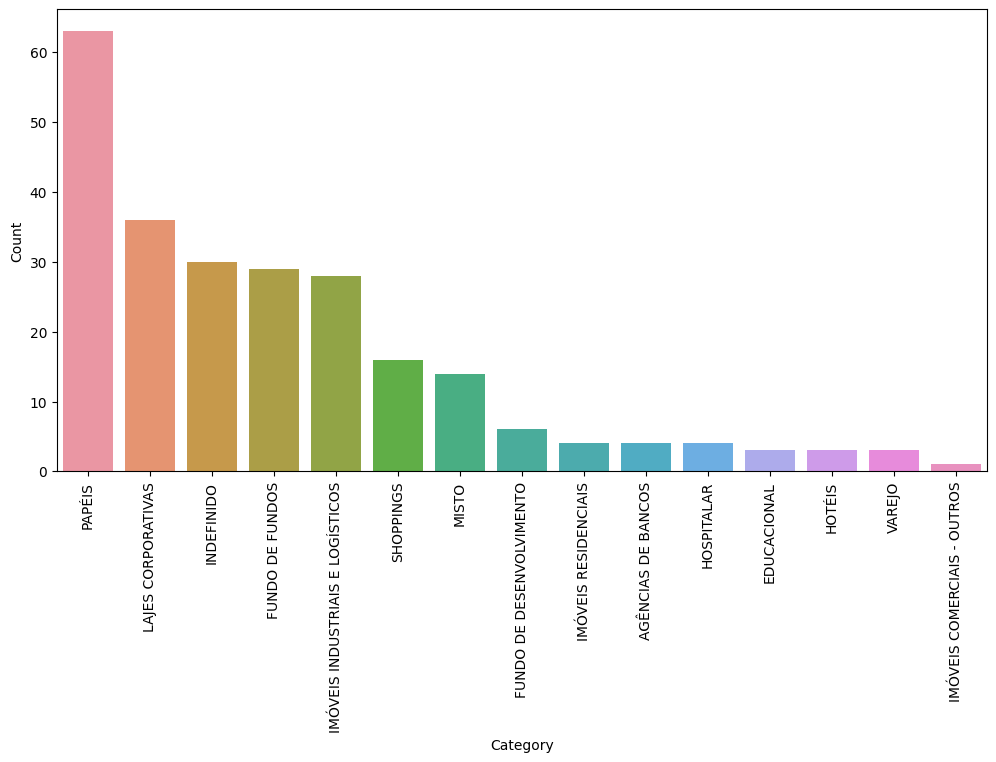

In [99]:
plt.figure(figsize=(12,6))
sns.countplot(x='Setor',data=df,order=df.Setor.value_counts().index)
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

plot para ver outliers de preço por tipo de fiis

___

Setor Papéis

In [147]:
df_papeis = df[df['Setor']=='PAPÉIS']
df_papeis = df_papeis.sort_values(by='Ultimo Dividendo', ascending=False)
df_papeis.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
64,CCRF11,PAPÉIS,90.99,4154.06,0.91,1.65,1.90,3.38,6.30,9.64,...,6.31,6.25,1.568094e+08,96.46,0.94,0.57,-1.87,-1.31,2.72,0
60,CACR11,PAPÉIS,107.80,629922.07,1.03,1.61,1.53,4.39,8.42,17.28,...,0.12,10.60,1.878970e+08,103.41,1.04,1.37,-0.05,1.32,37.55,0
217,MCHY11,PAPÉIS,111.13,384614.02,1.08,1.40,1.25,3.75,7.55,17.22,...,0.20,9.06,3.653825e+08,99.69,1.11,3.41,-3.72,-0.43,9.03,0
342,URPR11,PAPÉIS,100.73,2306002.33,1.00,1.34,1.36,4.15,8.12,15.47,...,2.17,5.26,1.169228e+09,99.33,1.01,1.12,-1.74,-0.64,22.93,0
178,JPPA11,PAPÉIS,100.35,359009.05,1.00,1.33,1.36,4.21,8.30,17.05,...,-0.11,0.12,8.972954e+07,99.04,1.01,1.41,-0.73,0.67,11.76,0
114,FLCR11,PAPÉIS,93.48,157761.26,0.94,1.31,1.35,4.12,7.73,13.65,...,4.18,8.17,6.283179e+07,98.63,0.95,0.91,-0.68,0.23,8.93,0
147,HGIC11,PAPÉIS,106.50,504197.34,0.91,1.28,1.22,2.09,4.66,10.79,...,1.26,-5.08,5.405856e+07,114.02,0.93,0.96,-2.08,-1.14,17.05,0
284,RBRY11,PAPÉIS,101.48,1580592.86,0.99,1.25,1.25,3.81,7.59,14.26,...,2.99,11.47,5.549563e+08,99.30,1.02,1.01,-0.58,0.42,3.41,0
242,OUJP11,PAPÉIS,101.98,636544.17,1.02,1.25,1.22,3.82,7.69,15.39,...,4.81,11.82,3.210059e+08,99.94,1.02,1.20,-1.18,0.01,13.55,0
134,HABT11,PAPÉIS,96.00,1497264.29,0.96,1.20,1.23,4.14,8.26,14.95,...,6.39,17.27,8.101703e+08,99.80,0.96,0.92,0.14,1.06,15.75,0


Setor Lajes Corporativas

In [148]:
df_lajes = df[df['Setor']=='LAJES CORPORATIVAS']
df_lajes = df_lajes.sort_values(by='Ultimo Dividendo', ascending=False)
df_lajes.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
105,FAMB11B,LAJES CORPORATIVAS,920.24,129941.85,0.34,9.16,0.56,2.18,4.80,10.11,...,-47.51,-53.68,3.084430e+08,3593.26,0.26,0.25,0.53,0.79,12.82,1
15,BBFI11B,LAJES CORPORATIVAS,1120.51,361223.69,0.52,7.19,0.63,2.68,7.20,15.53,...,-34.67,-38.09,2.791857e+08,2854.80,0.39,0.93,0.12,1.06,6.06,3
36,BMLC11,LAJES CORPORATIVAS,102.01,26877.22,0.93,3.59,3.47,4.96,6.99,11.61,...,2.87,10.80,1.105971e+08,109.14,0.93,0.81,-0.05,0.76,4.10,2
94,EDFO11B,LAJES CORPORATIVAS,192.50,4389.80,1.06,1.75,0.92,2.65,5.21,9.38,...,0.91,-9.04,4.265095e+07,191.82,1.00,0.86,-0.03,0.82,7.83,1
149,HGPO11,LAJES CORPORATIVAS,289.56,667207.33,0.96,1.60,0.58,1.84,3.76,7.42,...,6.03,9.65,5.243910e+08,267.63,1.08,0.60,-0.05,0.54,5.96,2
150,HGRE11,LAJES CORPORATIVAS,142.00,2525129.62,0.91,1.40,0.99,2.20,4.28,8.07,...,8.02,20.12,1.837461e+09,161.29,0.88,0.48,-0.12,0.36,2.41,19
83,CXCO11,LAJES CORPORATIVAS,85.44,207263.74,0.86,1.31,1.66,3.71,6.84,12.57,...,7.72,19.76,3.887611e+08,96.60,0.88,0.75,0.03,0.77,8.83,10
239,ONEF11,LAJES CORPORATIVAS,200.00,88952.62,0.85,1.02,0.52,1.58,3.29,6.59,...,6.99,16.44,2.095272e+08,201.40,0.99,0.46,15.10,15.63,21.27,1
118,FPAB11,LAJES CORPORATIVAS,186.99,2988.76,0.47,1.00,0.54,2.50,5.53,10.68,...,25.84,43.86,2.806816e+08,410.44,0.46,0.40,0.00,0.40,4.53,2
115,FLMA11,LAJES CORPORATIVAS,142.59,77885.86,0.89,0.97,0.69,2.13,4.11,8.52,...,10.06,13.72,2.206788e+08,157.29,0.91,0.59,0.07,0.66,6.45,2


Setor Indefinido

In [150]:
df_indefinido = df[df['Setor']=='INDEFINIDO']
df_indefinido = df_indefinido.sort_values(by='Ultimo Dividendo', ascending=False)
df_indefinido.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
17,BBGO11,INDEFINIDO,93.68,402146.02,0.84,2.35,2.60,4.93,8.61,14.53,...,8.38,20.28,3.925504e+08,98.01,0.96,1.04,0.08,1.12,9.31,0
75,CRAA11,INDEFINIDO,103.48,157763.52,1.02,1.50,1.44,4.51,5.97,5.97,...,0.96,6.12,5.018725e+07,101.42,1.02,1.48,0.00,0.00,0.00,0
96,EGAF11,INDEFINIDO,100.40,590684.67,1.03,1.40,1.39,4.02,8.15,25.48,...,0.71,6.18,1.095135e+08,98.07,1.02,1.22,0.00,0.00,0.00,0
177,JGPX11,INDEFINIDO,99.93,247475.90,1.00,1.35,1.33,3.93,7.90,15.00,...,5.65,12.90,8.178438e+07,96.43,1.04,1.21,0.48,1.70,12.76,0
168,IDFI11,INDEFINIDO,38.99,173530.21,0.97,1.30,3.10,13.71,23.95,38.17,...,-4.88,8.39,8.240892e+07,59.67,0.65,0.48,-1.60,-1.13,-18.15,2
73,CPTR11,INDEFINIDO,96.53,1858873.07,0.97,1.30,1.34,4.15,8.51,17.42,...,0.00,7.37,4.070996e+08,98.38,0.98,1.37,-0.31,1.06,2.50,0
190,KNCA11,INDEFINIDO,107.29,2646196.81,1.05,1.29,1.20,3.58,7.09,14.82,...,1.96,7.70,1.441823e+09,102.26,1.05,1.11,0.07,1.18,12.58,0
344,VCRA11,INDEFINIDO,96.60,620734.12,0.98,1.20,1.23,3.77,7.52,15.49,...,-2.09,-1.14,4.713737e+08,102.61,0.94,1.16,0.22,1.38,2.87,0
250,PLCA11,INDEFINIDO,92.00,44151.74,0.88,1.13,1.22,3.85,7.37,12.76,...,9.78,4.18,5.290857e+07,94.99,0.97,1.18,0.00,0.00,0.00,0
125,GCRA11,INDEFINIDO,93.33,337211.33,0.95,1.12,1.16,3.82,7.73,14.98,...,4.08,7.11,1.716086e+08,98.01,0.95,1.31,0.01,1.32,14.22,0


Setor Fundos de Fundos

In [151]:
df_f_fundos = df[df['Setor']=='FUNDO DE FUNDOS']
df_f_fundos = df_f_fundos.sort_values(by='Ultimo Dividendo', ascending=False)
df_f_fundos.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
186,KFOF11,FUNDO DE FUNDOS,97.48,1040574.43,0.96,1.00,1.08,2.91,5.69,10.81,...,9.71,25.52,4.423125e+08,92.06,1.06,0.78,-6.43,-5.70,6.11,0
180,JSAF11,FUNDO DE FUNDOS,97.45,638684.52,0.99,0.93,1.01,3.16,6.64,13.07,...,6.79,16.31,1.553302e+08,94.13,1.04,0.99,-4.06,-3.12,7.12,0
6,ALZM11,FUNDO DE FUNDOS,93.60,76188.64,1.02,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
22,BCIA11,FUNDO DE FUNDOS,106.00,804999.50,0.97,0.80,0.81,2.63,5.46,10.56,...,11.26,22.26,4.040178e+08,101.16,1.05,0.75,-5.66,-4.95,4.65,0
71,CPFF11,FUNDO DE FUNDOS,74.24,400125.95,0.89,0.75,1.00,2.32,4.24,9.40,...,14.58,20.74,2.111291e+08,78.73,0.94,0.76,-2.56,-1.82,6.71,0
306,RVBI11,FUNDO DE FUNDOS,85.25,211399.45,0.98,0.75,0.90,2.84,6.02,11.85,...,5.55,20.70,1.244864e+08,83.87,1.02,0.89,-2.88,-2.01,5.11,0
124,GCFF11,FUNDO DE FUNDOS,69.30,87694.83,0.89,0.75,1.15,3.26,6.29,11.93,...,-3.31,-5.59,2.793947e+07,82.69,0.84,0.87,-3.88,-3.05,-3.37,0
241,OUFF11,FUNDO DE FUNDOS,73.59,207722.79,0.94,0.72,1.00,3.15,6.55,13.06,...,8.24,20.23,1.411464e+08,76.15,0.97,0.92,-5.19,-4.32,5.61,3
93,DVFF11,FUNDO DE FUNDOS,85.41,47405.60,0.89,0.70,0.84,2.95,6.08,12.31,...,13.53,24.30,1.050454e+08,91.56,0.93,0.93,-4.01,-3.12,8.77,0
296,RFOF11,FUNDO DE FUNDOS,78.90,74570.38,0.95,0.70,0.92,2.90,5.99,11.72,...,7.50,15.72,8.919809e+07,80.55,0.98,0.91,-6.07,-5.22,1.08,0


Setor Imoveis Industriais e Logisticos

In [152]:
df_iil = df[df['Setor']=='IMÓVEIS INDUSTRIAIS E LOGÍSTICOS']
df_iil = df_iil.sort_values(by='Ultimo Dividendo', ascending=False)
df_iil.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
85,CXTL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,315.00,27752.02,0.76,7.74,2.41,7.41,16.47,46.33,...,-3.35,-7.09,2.222059e+07,686.89,0.46,0.20,-1.86,-1.66,-1.49,1
111,FIIB11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,507.87,225809.98,1.10,3.25,0.64,2.00,4.20,8.94,...,4.11,13.84,3.162176e+08,455.67,1.11,0.83,-0.10,0.74,7.62,9
101,EURO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,244.95,54851.02,0.75,1.90,0.78,2.34,4.71,9.51,...,5.23,11.63,1.248289e+08,312.91,0.78,0.61,0.01,0.62,6.68,7
148,HGLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,163.65,9624864.33,1.06,1.50,0.90,2.27,4.32,8.93,...,6.05,6.13,3.608679e+09,147.80,1.11,0.74,0.37,1.11,9.68,20
112,FIIP11B,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,178.49,63326.43,0.86,1.44,0.87,2.66,5.49,10.65,...,9.16,18.89,1.883974e+08,186.18,0.96,0.73,-0.12,0.60,0.12,7
233,NEWL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,115.00,1373344.24,0.96,1.37,1.27,3.12,5.92,11.77,...,8.62,17.41,2.404972e+08,120.99,0.95,0.74,-0.31,0.44,13.74,3
128,GGRC11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,121.26,1376880.93,1.06,1.05,0.85,2.64,5.46,10.44,...,6.32,12.11,9.261843e+08,124.59,0.97,0.82,-0.14,0.68,2.07,17
365,VTLT11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,99.70,176351.12,0.99,0.88,0.88,2.80,5.73,10.98,...,10.81,13.21,2.137423e+08,102.98,0.97,0.81,0.05,0.86,8.91,1
43,BRCO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,121.25,4047778.33,1.01,0.87,0.75,2.05,3.99,7.92,...,3.93,24.16,1.774187e+09,121.55,1.00,0.58,2.01,2.60,8.31,11
314,SDIL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,96.50,1030917.86,1.03,0.83,0.86,2.61,5.36,10.37,...,2.55,7.49,6.131580e+08,98.33,0.98,0.83,-0.22,0.61,9.86,5


Setor Shoppings

In [153]:
df_shop = df[df['Setor']=='SHOPPINGS']
df_shop= df_shop.sort_values(by='Ultimo Dividendo', ascending=False)
df_shop.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
257,PQDP11,SHOPPINGS,1995.00,124657.31,0.64,16.99,0.89,2.79,5.74,10.23,...,10.13,-6.16,7.663975e+08,3314.36,0.60,0.50,0.07,0.57,1.70,1
318,SHPH11,SHOPPINGS,799.00,137010.51,0.87,7.82,1.03,2.32,3.82,6.26,...,11.83,7.20,5.429901e+08,889.27,0.90,0.30,0.02,0.33,3.96,1
120,FVPQ11,SHOPPINGS,117.50,59605.40,0.61,1.80,1.65,3.33,6.10,9.52,...,8.51,15.10,5.392802e+08,198.60,0.59,0.28,-0.03,0.25,4.39,1
144,HGBS11,SHOPPINGS,226.25,1836236.24,1.01,1.45,0.67,2.10,4.40,8.46,...,5.61,19.74,2.223429e+09,216.98,1.04,0.65,-0.63,0.02,7.57,12
155,HPDP11,SHOPPINGS,82.98,7680.70,0.93,1.00,1.35,2.71,3.93,6.81,...,5.70,12.18,2.603080e+08,95.00,0.87,0.53,0.14,0.67,5.81,1
355,VISC11,SHOPPINGS,119.57,4520231.98,1.03,0.85,0.71,2.16,4.51,8.69,...,2.16,17.87,2.142724e+09,114.93,1.04,0.66,-0.04,0.62,5.92,20
380,XPML11,SHOPPINGS,105.80,7201790.26,1.06,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.04,0.76,-0.66,0.10,6.56,12
210,MALL11,SHOPPINGS,115.60,3264900.05,0.96,0.80,0.68,2.14,4.48,8.85,...,8.02,18.69,1.094884e+09,107.86,1.07,0.72,1.59,2.33,3.97,9
160,HSML11,SHOPPINGS,94.50,2986709.24,0.99,0.74,0.79,2.50,5.25,9.97,...,7.22,20.51,1.500704e+09,97.37,0.97,0.70,-0.19,0.51,4.26,7
363,VSHO11,SHOPPINGS,80.00,143830.95,0.78,0.72,0.92,2.99,6.09,10.71,...,13.02,21.92,2.113756e+08,98.91,0.81,0.69,0.13,0.82,3.57,3


Setor Misto

In [154]:
df_misto = df[df['Setor']=='MISTO']
df_misto = df_misto.sort_values(by='Ultimo Dividendo', ascending=False)
df_misto.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
196,KNRI11,MISTO,162.00,4008255.76,1.00,1.51,0.95,2.22,4.25,8.07,...,5.91,18.89,3.869616e+09,160.12,1.01,0.57,-0.09,0.47,7.86,19
151,HGRU11,MISTO,132.50,3708227.86,1.07,1.40,1.06,2.43,4.60,9.53,...,6.75,13.40,2.273290e+09,120.00,1.10,0.68,-0.37,0.31,9.23,71
244,OURE11,MISTO,84.30,132605.26,0.92,1.00,1.19,3.69,7.66,15.40,...,4.44,9.87,9.920371e+07,92.02,0.92,1.14,-2.16,-1.04,11.12,4
368,VVPR11,MISTO,101.50,1249061.55,1.04,0.89,0.89,2.47,4.88,9.72,...,1.30,15.02,2.260322e+08,103.41,0.98,0.74,0.02,0.76,1.53,6
310,RZTR11,MISTO,94.07,1996349.14,0.96,0.85,0.93,2.87,5.83,12.74,...,2.03,-2.83,1.074906e+09,97.31,0.97,1.28,0.00,1.29,10.37,15
7,ALZR11,MISTO,115.48,2814420.83,1.06,0.83,0.70,2.14,4.31,12.40,...,3.60,7.77,1.051986e+09,106.94,1.08,0.68,-0.03,0.65,7.26,13
102,EVBI11,MISTO,96.10,161499.79,0.98,0.75,0.77,2.34,4.75,9.35,...,0.98,7.85,2.123205e+08,100.21,0.96,0.75,-0.71,0.03,7.70,8
316,SEQR11,MISTO,66.99,213079.38,0.70,0.71,1.11,3.37,6.82,12.99,...,4.16,11.20,1.503134e+08,96.27,0.70,0.70,0.22,0.93,7.92,4
312,SARE11,MISTO,60.83,1479197.55,0.65,0.59,0.91,2.86,6.06,11.36,...,-2.28,1.21,8.736868e+08,94.59,0.64,0.68,-3.24,-2.59,2.42,3
181,JSRE11,MISTO,79.79,2878431.05,0.71,0.46,0.58,1.88,4.07,7.75,...,7.30,13.70,2.340997e+09,113.42,0.70,0.43,0.00,0.44,4.34,6


In [124]:
df

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,9.42,930832.31,1.01,0.10,1.03,3.83,8.26,8.26,...,1.98,7.77,2.306468e+08,9.60,0.98,1.46,0.00,0.00,0.00,0
1,ABCP11,SHOPPINGS,71.90,59727.24,0.78,0.50,0.70,2.15,4.44,8.96,...,3.54,1.08,4.321627e+08,91.82,0.78,0.65,-0.18,0.47,7.12,1
2,AFHI11,PAPÉIS,96.36,992736.38,1.00,1.10,1.11,3.38,6.80,13.31,...,1.92,8.99,2.903880e+08,94.82,1.02,1.01,-0.94,0.06,5.00,0
4,AIEC11,LAJES CORPORATIVAS,71.57,510684.48,0.75,0.78,1.10,3.59,6.31,13.04,...,11.26,8.62,4.564693e+08,102.56,0.70,0.73,0.24,0.98,9.40,2
6,ALZM11,FUNDO DE FUNDOS,93.60,76188.64,1.02,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,XPIN11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,81.04,469376.64,0.79,0.65,0.78,2.43,5.19,10.16,...,6.12,18.45,7.301584e+08,103.81,0.78,0.63,-1.37,-0.75,0.75,98
379,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.27,3722896.52,1.01,0.79,0.69,2.14,4.52,8.76,...,8.57,20.56,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,19
380,XPML11,SHOPPINGS,105.80,7201790.26,1.06,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.04,0.76,-0.66,0.10,6.56,12
381,XPPR11,LAJES CORPORATIVAS,22.42,272362.43,0.32,0.10,0.43,1.29,2.93,7.41,...,-1.71,-26.59,5.163569e+08,74.77,0.30,0.40,0.05,0.45,-3.65,5
